In [13]:
### Data cleaning: data from WHO and Worldbank data

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [14]:
#### countries we're interested in
countries = [
    "Angola",
    "Burundi",
    "Cameroon",
    "Central African Republic",
    "Chad",
    "Democratic Republic of the Congo",
    "Equatorial Guinea",
    "Gabon",
    "Congo",
    "Rwanda",
    "Sao Tome and Principe"
]

In [15]:
# medical doctors per 10,000
df_md = pd.read_csv("../data/MD_10000.csv")
#df_md.head()

In [16]:
### keep data from latest year -> only work with this
## 195 countries
df_md_work = df_md[df_md["IsLatestYear"] == True]
#df_md_work.shape

# print(df_md_work["Location"].to_string())

In [17]:
### Keep variables of interest:
# Country, Country Code, Value of indicator, Year of data

##  also include year of data
df_md_work = df_md_work[["ParentLocation", "ParentLocationCode", "Location", "Value", "Period", "SpatialDimValueCode"]]

df_md_merge = df_md_work.rename(columns = {"Value" : "Medical Doctors per 10k inhabitants",
                                          "Period" : "Period_doctor_data"})

#df_md_merge.head()

In [18]:
df_under5 = pd.read_csv("../data/under_five.csv")
#df_under5.head()

In [19]:
df_under5.columns
test = df_under5[df_under5['Location'].isin(countries)]
# we only have data from 9 countries from the area
#print(test["Location"].unique())
#print(countries)

In [20]:
df_under5_work = df_under5[df_under5["IsLatestYear"] == True]
#print(df_under5_work.shape)

# drop Na rows
df_under5_work = df_under5_work.dropna(subset=['FactValueNumeric'])

df_under5_work["FactValueNumeric"]

0       1.56
1       1.72
2       1.79
3       1.86
4       1.91
       ...  
592    97.07
593    97.62
594    98.69
595    98.73
596    99.92
Name: FactValueNumeric, Length: 597, dtype: float64

In [21]:
## under 5 mortality is reported by sex, and total:
## take only row with both sexes
df_under5_work = df_under5_work[df_under5_work["Dim1"] == "Both sexes"]
# set country as index or reset_index() after grouping

## only keep important columns and drop rows where no FactValueNumeric is present
df_under5_merge = df_under5_work[["Location", "Period", "FactValueNumeric"]]

In [22]:
#df_under5_merge

df_under5_merge = df_under5_merge.rename(columns = {"FactValueNumeric" : "Infant mortality per 1000 live births"})

#df_under5_merge

In [23]:
### Match the Medical doctors and the infant mortality data set
# only keep rows where both data sets has rows
WHO_data = pd.merge(df_md_merge, df_under5_merge, on='Location', how='inner')

WHO_data["MD to Mortality ratio"] = WHO_data["Medical Doctors per 10k inhabitants"]/WHO_data["Infant mortality per 1000 live births"]

#WHO_data.head()

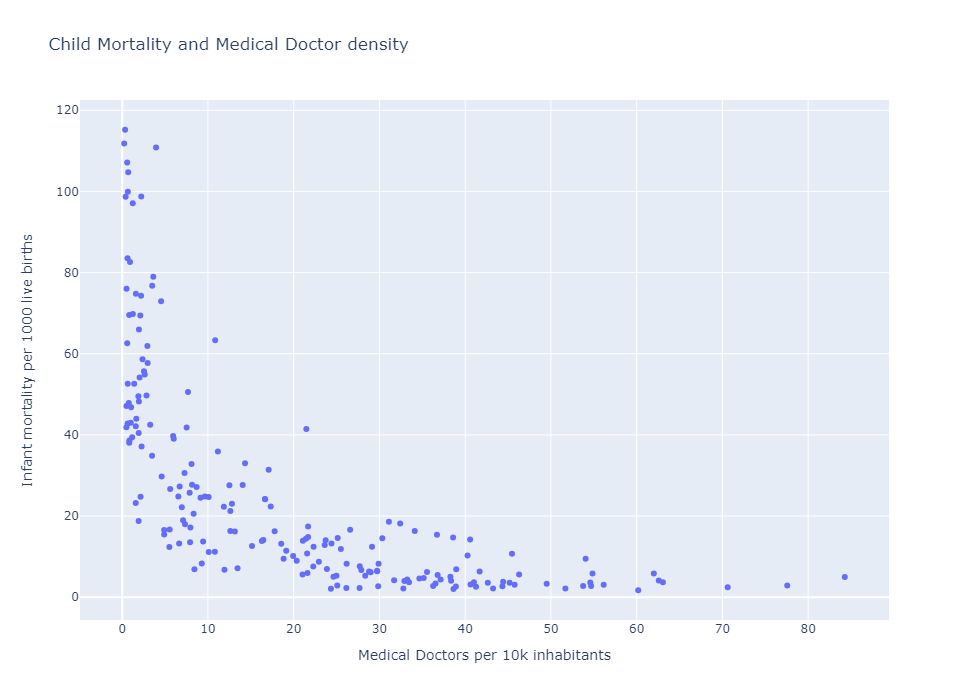

In [26]:
## scatter plot MD and infant mortality

fig = px.scatter(WHO_data, x="Medical Doctors per 10k inhabitants", y="Infant mortality per 1000 live births",
                hover_data=['Location'], title = "Child Mortality and Medical Doctor density")

fig.update_layout(height = 700)
fig.show()
